# Star ratings prediction - model comparison and training

##Introduction:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Omdena/

/content/drive/MyDrive/Omdena


# Installations

In [ ]:
!pip install fastparquet

     |████████████████████████████████| 122kB 15.8MB/s 
     |████████████████████████████████| 3.2MB 36.1MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
     |████████████████████████████████| 25.3MB 135kB/s 
  Created wheel for fastparquet: filename=fastparquet-0.5.0-cp36-cp36m-linux_x86_64.whl size=211214 sha256=8f56be2fa9d083ef77cfdab6d0695ce1abac8d9a2a97d1ede571df17e0fb5b47
  Stored in directory: /root/.cache/pip/wheels/97/0e/da/e2122965947ab2bfbc20e31a968e998fc8932f7fcb0ed78ad0
  Created wheel for thrift: filename=thrift-0.13.0-cp36-cp36m-linux_x86_64.whl size=345216 sha256=61179bfa38ac4d106f7a10e55064ec950ea830eb4b9db0a1d3f2a79520c4a157
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling n

# Imports

In [ ]:
# imports
import pandas as pd
#import fastparquet
import numpy as np

# Data Preprocessing

In [ ]:
# converting the parquet to pandas dataframe
df = pd.read_parquet('all_star_all_ord_enc')

In [ ]:
# checking the shape of df
np.shape(df)

(82859, 65)

In [ ]:
# checking column names
df.columns

Index(['car_star_rating_star', 'motorcycle_star_rating_star',
       'pedestrian_star_rating_star', 'bicycle_star_rating_star',
       'vehicle_flow', 'motorcycle_percent', 'ped_peak_hour_flow_across',
       'ped_peak_hour_flow_along_driver_side',
       'ped_peak_hour_flow_along_passenger_side', 'bicycle_peak_hour_flow',
       'carriageway', 'intersection_type', 'sidewalk_driver_side',
       'sidewalk_passenger_side', 'facilities_for_bicycles',
       'paved_shoulder_driver_side', 'paved_shoulder_passenger_side',
       'property_access_points', 'roadside_severity_driver_side_object',
       'skid_resistance_grip', 'curvature', 'median_type', 'number_of_lanes',
       'ped_fencing', 'intersection_quality', 'intersecting_road_volume',
       'roadside_severity_driver_side_distance',
       'roadside_severity_passenger_side_distance',
       'operating_speed_85th_percentile', 'operating_speed_mean',
       'speed_limit', 'school_zone_crossing_supervisor', 'grade', 'lane_width',
     

### Choosing columns:

In [ ]:
#features able to be automatically extracted within the pipeline

likely_cols = ['car_star_rating_star', 'motorcycle_star_rating_star','pedestrian_star_rating_star',
'bicycle_star_rating_star',
                #from task 2
       'vehicle_flow','motorcycle_percent', 'ped_peak_hour_flow_across',
       'ped_peak_hour_flow_along_driver_side',
       'ped_peak_hour_flow_along_passenger_side', 'bicycle_peak_hour_flow',
       'motorcycle_observed_flow','bicycle_observed_flow',
       'ped_observed_flow_across', 'ped_observed_flow_along_driver_side',
       'ped_observed_flow_along_passenger_side',
       #from task 7 
       'curvature','area_type','speed_limit','lane_width','number_of_lanes']

#        #maybe
#        # from task 2
# maybe_cols =  ['ped_fencing',,'truck_speed_limit',
#        'motorcycle_speed_limit','speed_management',
#        ,'intersecting_road_volume',
#        #from task 7
#       'school_zone_warning','intersection_type']

# not_cols = ['carriageway','sidewalk_driver_side',
#        'sidewalk_passenger_side', 'facilities_for_bicycles',
#        'paved_shoulder_driver_side', 'paved_shoulder_passenger_side',
#        'property_access_points', 'roadside_severity_driver_side_object',
#        'skid_resistance_grip', , 'median_type', 
#        , 'intersection_quality',
#        'roadside_severity_driver_side_distance',
#        'roadside_severity_passenger_side_distance',
#        'operating_speed_85th_percentile', 'operating_speed_mean',
#        , 'school_zone_crossing_supervisor', 'grade',
#        'road_condition', 'ped_crossing_quality', 'sight_distance',
#        'quality_of_curve', , 'shoulder_rumble_strips',
#        'street_lighting', , 'intersection_channelisation',
#        'delineation',
#         'land_use_driver_side',
#        'land_use_passenger_side',
#         'roadside_severity_passenger_side_object',
#        'service_road', 'roadworks', 'differential_speed_limits',
#        'centreline_rumble_strips', 'ped_crossing_facilities_inspected_road',
#        'ped_crossing_facilities_intersecting_road', 'vehicle_parking',
#        'facilities_for_motorised_two_wheelers', 'roads_that_cars_can_read']
df_select = df.drop(columns='upgrade_cost')
#df_select = df#[likely_cols]
print(df_select.columns)

Index(['car_star_rating_star', 'motorcycle_star_rating_star',
       'pedestrian_star_rating_star', 'bicycle_star_rating_star',
       'vehicle_flow', 'motorcycle_percent', 'ped_peak_hour_flow_across',
       'ped_peak_hour_flow_along_driver_side',
       'ped_peak_hour_flow_along_passenger_side', 'bicycle_peak_hour_flow',
       'carriageway', 'intersection_type', 'sidewalk_driver_side',
       'sidewalk_passenger_side', 'facilities_for_bicycles',
       'paved_shoulder_driver_side', 'paved_shoulder_passenger_side',
       'property_access_points', 'roadside_severity_driver_side_object',
       'skid_resistance_grip', 'curvature', 'median_type', 'number_of_lanes',
       'ped_fencing', 'intersection_quality', 'intersecting_road_volume',
       'roadside_severity_driver_side_distance',
       'roadside_severity_passenger_side_distance',
       'operating_speed_85th_percentile', 'operating_speed_mean',
       'speed_limit', 'school_zone_crossing_supervisor', 'grade', 'lane_width',
     

In [ ]:
#split into train,valid,test splits
#!pip install scikit-learn
from sklearn.model_selection import train_test_split
df_select_train, df_select_test = train_test_split(df_select,train_size = 0.95) 
print(df_select_train.shape)
print(df_select_test.shape)

(78716, 64)
(4143, 64)


In [ ]:
#split the train and test sets into x and y columns
x_cols = df_select.columns[4:] #choose input columns
y_cols = df_select.columns[0:4] #choose target (star ratings) columns

#ake x train and test datasets
df_x_train = df_select_train[x_cols] 
df_x_test = df_select_test[x_cols] 

#make y train and test datasets
df_y_train = df_select_train[y_cols]
df_y_test = df_select_test[y_cols]

#check the shapes of the datasets
print('x_train shape: ',df_x_train.shape)
print('x_test shape: ',df_x_test.shape)
print('y_train shape: ',df_y_train.shape)
print('y_test shape: ',df_y_test.shape)

#check the columns are correct
print('x columns:')
print(df_x_train.columns)
print('y columns:')
print(df_y_train.columns)

x_train shape:  (78716, 60)
x_test shape:  (4143, 60)
y_train shape:  (78716, 4)
y_test shape:  (4143, 4)
x columns:
Index(['vehicle_flow', 'motorcycle_percent', 'ped_peak_hour_flow_across',
       'ped_peak_hour_flow_along_driver_side',
       'ped_peak_hour_flow_along_passenger_side', 'bicycle_peak_hour_flow',
       'carriageway', 'intersection_type', 'sidewalk_driver_side',
       'sidewalk_passenger_side', 'facilities_for_bicycles',
       'paved_shoulder_driver_side', 'paved_shoulder_passenger_side',
       'property_access_points', 'roadside_severity_driver_side_object',
       'skid_resistance_grip', 'curvature', 'median_type', 'number_of_lanes',
       'ped_fencing', 'intersection_quality', 'intersecting_road_volume',
       'roadside_severity_driver_side_distance',
       'roadside_severity_passenger_side_distance',
       'operating_speed_85th_percentile', 'operating_speed_mean',
       'speed_limit', 'school_zone_crossing_supervisor', 'grade', 'lane_width',
       'road_con

# Model Comparisons:

In this section we will use the pycaret AutoML package to compare different models for predicting the star ratings. Pycaret is a 'low code' package meaning that with relatively few high level commands, a number of models can be trained and compared.

There are two different modules available depending on whether the star ratings prediction is framed as a regression problem (numerical output e.g star rating of 3.2 which can be rounded down to 3.0) or classification problem (category output e.g 2 star).

Regression Module Docs [https://pycaret.readthedocs.io/en/latest/api/regression.html#]

Classification Module Docs [https://pycaret.readthedocs.io/en/latest/api/classification.html] 


In [ ]:
!pip install pycaret

In [ ]:
#choose regression or classification and uncomment as needed
#from pycaret.regression import * 
#from pycaret.classification import *

#choose column data types:
# Note: the datatypes given below are assuming ordinal encoding on all categorical input features has been applied
# If target encoding is used , all of the target transformed nominal input features will need to be set as numerical
# e.g num_cols = 'area_type_1.0','area_type_2.0','area_type_3.0' etc
# If one-hot encoding is used, all columns will be set as numerical 

#select the columns which are numerical datatype
num_cols = ['vehicle_flow']

#select the input features which are categorical datatype
cat_cols = ['motorcycle_percent', 'ped_peak_hour_flow_across',
       'ped_peak_hour_flow_along_driver_side',
       'ped_peak_hour_flow_along_passenger_side',
       'bicycle_peak_hour_flow', 'carriageway', 'intersection_type',
       'sidewalk_driver_side', 'sidewalk_passenger_side',
       'facilities_for_bicycles', 'paved_shoulder_driver_side',
       'paved_shoulder_passenger_side', 'property_access_points',
       'roadside_severity_driver_side_object', 'skid_resistance_grip',
       'curvature', 'median_type', 'number_of_lanes', 'ped_fencing',
       'intersection_quality', 'intersecting_road_volume',
       'roadside_severity_driver_side_distance',
       'roadside_severity_passenger_side_distance',
       'operating_speed_85th_percentile', 'operating_speed_mean',
       'speed_limit', 'school_zone_crossing_supervisor', 'grade',
       'lane_width', 'road_condition', 'ped_crossing_quality',
       'sight_distance', 'quality_of_curve', 'area_type',
       'shoulder_rumble_strips', 'street_lighting', 'speed_management',
       'intersection_channelisation', 'delineation',
       'school_zone_warning', 'motorcycle_observed_flow',
       'bicycle_observed_flow', 'ped_observed_flow_across',
       'ped_observed_flow_along_driver_side',
       'ped_observed_flow_along_passenger_side', 'land_use_driver_side',
       'land_use_passenger_side', 'motorcycle_speed_limit',
       'truck_speed_limit', 'roadside_severity_passenger_side_object',
       'service_road', 'roadworks', 'differential_speed_limits',
       'centreline_rumble_strips',
       'ped_crossing_facilities_inspected_road',
       'ped_crossing_facilities_intersecting_road', 'vehicle_parking',
       'facilities_for_motorised_two_wheelers',
       'roads_that_cars_can_read']


In [ ]:
#we need to choose a target star rating column (car,motorbike,pedestrian,bicycle) that the models will try to predict:
# in function below set target = df_y_train.car_star_rating_star
# or target = df_y_train.motorcycle_star_rating_star
# or target = df_y_train.pedestrian_star_rating_star
# or target = df_y_train.bicycle_star_rating_star


#now we set up the pycaret comparison engine to compare all of the models:
#a summary screen should appear with the various options from the setup function, press enter to confirm or quit to change options
comparison = setup(df_x_train,  #choose dataset with input features
                   target=df_y_train.car_star_rating_star, # choose  star rating target
                   use_gpu = True, #if True gives faster calculation for the more complicated models
                   categorical_features=cat_cols, #set the categorical features
                   numeric_features=num_cols, #set the numerical features
                   normalize=False, normalize_method='minmax', #options for normalisation if not done previously
                   preprocess=False, #automatically get data into appropiate formats to be passed into the model
                   train_size=0.80, #choose percentage of the dataset to use for training
                   fold=5 #choose number of cross fold validations (larger numbers mean more processing time is needed)
                   )

In [ ]:
#now we run the model comparisons:
compare_models()

In [ ]:
#other pycaret functions which may be useful:

#create a specific model:
#model = create_model('model_name') # choose model string from https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model

#tune a model's hyperparameters: (takes a long time, maybe smaller sample sizes can be used to tune the model and then a new model can be trained with the optimal hyperparameters on a largr dataset)
#model_tuned = tune_model(model) 

#there are various ensemble methods such as blending,bagging,stacking and others which may increase predictive power
#https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.ensemble_model

#plot various model parameters (can be used to see importance of features) https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.plot_model
#plot_model(model,plot='feature_all')

## Model Construction and Training

In this section, now that the best performing models have been identified with pycaret, they will be implemented within sk-learn.

It may be possible to use the pycaret package to implement the models as well but for the sake of simplicity and time limits during the project, sk-learn was chosen. 

During the project, when looking at regression models, the top three performing models were consistently as follows:

1. Random forest regressor
2. Extreme Gradient Boosting (xgboost) regressor
3. Category Booster (catboost) regressor

The random forest regressor can be used directly from the sk-learn package, and the other two models need to be installed and imported.

During the project, it was also discovered that stacking the three individual models (essentially combining into a single 'meta-model') gives better accuracy when predicting star ratings.

In [ ]:
#install models
#note that the versions are given for compatability within the project for exporting models, the specific version can be removed if needed)

#install xgboost 
!pip install xgboost==0.90
#install catboost
!pip install catboost==0.24.4

     |████████████████████████████████| 65.8MB 48kB/s 


In [ ]:
#import three best performing models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

#import stacking model to improve accuracy of individual models
from sklearn.ensemble import StackingRegressor

#initiate models
ran_for_reg = RandomForestRegressor() 
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror',eval_metric='rmse')
cat_boost_reg = CatBoostRegressor(loss_function='RMSE')

#set a list of estimator models and their string shorthand to be passed into the stacking regressor

estimators = [
              ('rf', ran_for_reg),
('xgb_reg', xgb_reg),
('cat_boost',cat_boost_reg)
]


#choose appropiate target star rating to create a model to predict star rating and uncomment the two lines

#car
# stack_reg_car = StackingRegressor(estimators=estimators,verbose=2)
# stack_reg_car.fit(df_x_train,df_y_train.car_star_rating_star) 

#motorcycle
# stack_reg_motorcycle = StackingRegressor(estimators=estimators,verbose=2)
# stack_reg_motorcycle.fit(df_x_train,df_y_train.motorcycle_star_rating_star)

#pedestrian 
# stack_reg_pedest = StackingRegressor(estimators=estimators,verbose=2)
# stack_reg_pedest.fit(df_x_train,df_y_train.pedestrian_star_rating_star) 

#bike
stack_reg_bike = StackingRegressor(estimators=estimators,verbose=2)
stack_reg_bike.fit(df_x_train,df_y_train.bicycle_star_rating_star)

print('finished fitting')

### Model Evaluation:

In this section we will save the model if needed and then evaluate the performance of the model on the testing set (data that the model has not seen before).

#### Saving the model(optional):

In [ ]:
#save the model in joblib format if required
from joblib import dump, load
dump(stack_reg_bike,'bike_star_rating_model_all_features.joblib')
#dump(<fitted_model_name>,'<filename>') e.g dump(stack_reg_car,'test.joblib') to save the stacked model for predicting car star ratings 

['bike_star_rating_model_all_features.joblib']

#### Evaluating the model performance:

In [ ]:
#now we use the test set input features to make predictions about the star rating
#choose appropiate star rating type to predict:

#predict car star rating
y_preds = stack_reg_car.predict(df_x_test)

#predict motorcycle star rating
#y_preds = stack_reg_motorcycle.predict(df_x_test)

#predict pedestrian star rating 
#y_preds = stack_reg_pedest.predict(df_x_test)

#predict bicycle star rating
#y_preds = stack_reg_bike.predict(df_x_test)

#check to see y_preds has been filled correctly
y_preds

array([2.37204381, 1.4571994 , 1.22105203, ..., 2.82534732, 1.85946549,
       2.39226297])

In [ ]:
#now we round each prediction to the nearest integer to match up with the irap star ratings system
#we use a method so that any value that would be rounded to zero receives a 1 instead

#create a new dataframe with the predictions
df_y_preds = pd.DataFrame(y_preds)

#create a new dataframe with integers by rounding the previous values to 0 decimal places and converting to int type
df_y_preds_int = df_y_preds.round(0).astype(int)

#it is not possible to have a star rating of zero and so we replace any value of 0 with a 1
df_y_preds_int = df_y_preds_int.replace(to_replace=0,value=1)

#check to see the above steps have been applied correctly
df_y_preds_int.head()

,0
0,3
1,2
2,1
3,1
4,1


In [ ]:
df_y_preds_int.to_array()

NameError: ignored

Now we check the performance of the model. Any metrics can be used but in this case we chose the r squared score and the mean square error as the most relevant metrics. 

We will also create a confusion matrix, which shows the number of predictions for each star rating as well as the actual star rating. If the model is performing well, the squares with the most numbers should be where the prediction matches the actual star rating.

bicycle_star_rating_star  results:
R2 = 0.6721410022724251
MSE = 0.4573980207579049
[[1349  278   58    8    6]
 [  80  737  167    9    0]
 [   7  224  676   57    5]
 [   0    8  106  110   10]
 [   4   11   47  106   80]]


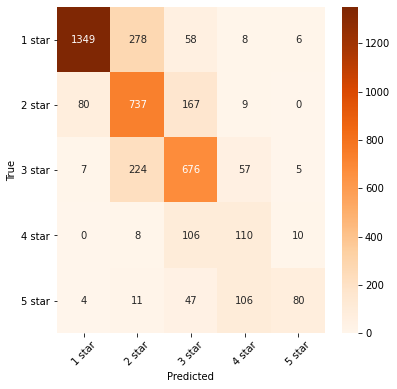

r2_list:  [0.6721410022724251]
mse_list:  [0.4573980207579049]
0.6721410022724251,0.4573980207579049


In [ ]:
#import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import  r2_score as r2

#import visualisation tools
import seaborn 
import matplotlib.pyplot as plt

labels = ['1 star','2 star','3 star','4 star','5 star']

#choose appropiate target (make sure it matches the target type used to make the predictions)
target = 0 #car_star_rating
target = 1 #motorbike star rating
target = 2 #pedestrian star rating
target = 3 #bicycle star rating

print(df_y_test.columns[target],' results:') #change based on star rating: order 'car_star_rating_star', 'motorcycle_star_rating_star',  'pedestrian_star_rating_star', 'bicycle_star_rating_star'
y_true_temp  = df_y_test[df_y_test.columns[target]] #change based on star rating
y_pred_temp = df_y_preds_int

#show metrics
  #r2
r2_temp = r2(y_true_temp,y_pred_temp)
print('R2 score =',r2_temp) 

#mse
mse_temp = mse(y_true_temp,y_pred_temp)
print('MSE =',mse_temp)

#show confusion matrix
conf_mat =cm(y_true_temp,y_pred_temp) 
print(conf_mat)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
seaborn.heatmap(conf_mat,annot=True,cmap='Oranges',fmt='g')
ax.set_xticklabels(labels,rotation=45)
ax.set_yticklabels(labels,rotation=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()